Enter Skin Tone (e.g., light, medium, dark): dark
Enter Undertone (e.g., warm, cool, neutral): cool
Enter Eye Color (e.g., blue, green, brown, hazel): brown
Enter Hair Color (e.g., blonde, brown, black): brown
Predicted Season: Autumn


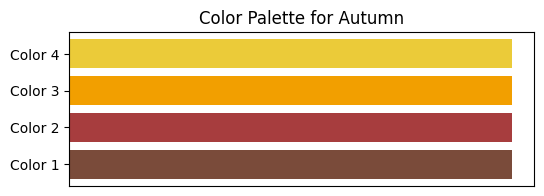

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('large_synthetic_season_dataset.csv')

# Preprocess data
X = df.drop('Season', axis=1)  # Features
y = df['Season']                # Target variable

# Encode categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, r'C:\Users\Muqee\Desktop\model\season_model.pkl')

# Load the saved model
model = joblib.load(r'C:\Users\Muqee\Desktop\model\season_model.pkl')

def predict_season(skin_tone, undertone, eye_color, hair_color):
    # Create a DataFrame for the input
    input_data = pd.DataFrame([{
        'Skin Tone': skin_tone,
        'Undertone': undertone,
        'Eye Color': eye_color,
        'Hair Color': hair_color
    }])

    # Encode the input data
    input_data = pd.get_dummies(input_data, drop_first=True)

    # Align columns with the model's expected format
    for col in model.feature_names_in_:
        if col not in input_data.columns:
            input_data[col] = 0

    # Predict the season
    prediction = model.predict(input_data)[0]
    return prediction

# Color palettes for each season
color_palettes = {
    'Spring': ['#FFB300', '#FFDB3A', '#FF6F20', '#F17D4D'],
    'Summer': ['#A2D5E9', '#FF6F61', '#A4D65E', '#F3D2A8'],
    'Autumn': ['#7A4B3A', '#A73D3E', '#F29F00', '#EBCB39'],
    'Winter': ['#0A0E24', '#A0B3C8', '#6C93C5', '#A1C9E4']
}

# Get user input
skin_tone = input("Enter Skin Tone (e.g., light, medium, dark): ")
undertone = input("Enter Undertone (e.g., warm, cool, neutral): ")
eye_color = input("Enter Eye Color (e.g., blue, green, brown, hazel): ")
hair_color = input("Enter Hair Color (e.g., blonde, brown, black): ")

# Predict the season based on user input
predicted_season = predict_season(skin_tone, undertone, eye_color, hair_color)
print(f"Predicted Season: {predicted_season}")

# Show color palette for the predicted season
def display_color_palette(season):
    colors = color_palettes.get(season, [])
    plt.figure(figsize=(6, 2))
    plt.title(f"Color Palette for {season}")
    plt.barh(range(len(colors)), [1] * len(colors), color=colors)
    plt.yticks(range(len(colors)), [f"Color {i+1}" for i in range(len(colors))])
    plt.xticks([])
    plt.show()

display_color_palette(predicted_season)


In [ ]:
# Load the dataset
df = pd.read_csv( 'large_synthetic_season_dataset.csv')
df.head()

,Skin Tone,Eye Color,Hair Color,Undertone,Season
0,Light,Green,Brown,Neutral,Summer
1,Dark,Hazel,Red,Neutral,Autumn
2,Light,Blue,Brown,Warm,Autumn
3,Dark,Blue,Blonde,Neutral,Summer
4,Dark,Hazel,Brown,Neutral,Winter
